In [790]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [791]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [792]:
df_test = pd.read_csv('D:\AIT\Sem 1\Machine Learning\Medical_prediction\Medical_prediction\data\Testing.csv')
df = pd.read_csv('D:\AIT\Sem 1\Machine Learning\Medical_prediction\Medical_prediction\data\Training.csv')

In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [794]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [795]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.0,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.04

In [796]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [797]:
columns_with_zeros = df.columns[(df == 0).all()]
columns_with_zeros

Index(['fluid_overload'], dtype='object')

In [798]:
df.drop(columns=['fluid_overload.1','fluid_overload'],inplace=True)

In [799]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [800]:
label_mapping = {
    'Acne': 'Skin Disorders',
    'Psoriasis': 'Skin Disorders',
    'Impetigo': 'Skin Disorders'
}

df['prognosis'] = df['prognosis'].replace(label_mapping)

In [801]:
skin_disorders_symptoms = df[df['prognosis'] == 'Skin Disorders'].iloc[:, :-2]

skin_disorders_symptoms = skin_disorders_symptoms.columns[skin_disorders_symptoms.eq(1).any()]

skin_disorders_symptoms_list = skin_disorders_symptoms.tolist()

In [802]:
skin_disorders_symptoms_list

['skin_rash',
 'joint_pain',
 'high_fever',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose',
 'yellow_crust_ooze']

In [803]:
symptom_column = 'yellow_crust_ooze'

diseases_with_symptom = df[df[symptom_column] == 1]['prognosis']

In [804]:
diseases_with_symptom.unique()

array(['Skin Disorders'], dtype=object)

In [805]:
columns_to_drop = ['pus_filled_pimples', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'skin_peeling','yellow_crust_ooze']
df.drop(columns=columns_to_drop, inplace=True)

In [806]:
df = df[df['prognosis'] != 'Skin Disorders']

In [807]:
df.shape

(4560, 122)

In [808]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [809]:
diseases_with_chills = df[df['chills'] == 1]['prognosis']
diseases_with_chills.unique()

array(['Allergy', 'Malaria', 'Dengue', 'Typhoid', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [810]:
diseases_with_shivering = df[df['shivering'] == 1]['prognosis']
diseases_with_shivering.unique()

array(['Allergy'], dtype=object)

In [811]:
df['shivering_or_chills'] = df['shivering'] | df['chills']
df.drop(columns=['shivering','chills'], inplace=True)

In [812]:
diseases_with_shivering_or_chills = df[df['shivering_or_chills'] == 1]['prognosis']
diseases_with_shivering_or_chills.unique()

array(['Allergy', 'Malaria', 'Dengue', 'Typhoid', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [813]:
diseases_with_nodal_skin_eruptions = df[df['nodal_skin_eruptions'] == 1]['prognosis']
diseases_with_nodal_skin_eruptions.unique()

array(['Fungal infection'], dtype=object)

In [814]:
diseases_with_nodal_skin_rash = df[df['skin_rash'] == 1]['prognosis']
diseases_with_nodal_skin_rash.unique()

array(['Fungal infection', 'Drug Reaction', 'Chicken pox', 'Dengue'],
      dtype=object)

In [815]:
df['skin_rash'] = df['nodal_skin_eruptions'] | df['skin_rash']
df.drop(columns=['nodal_skin_eruptions'], inplace=True)

In [816]:
diseases_with_skin_rash = df[df['skin_rash'] == 1]['prognosis']
diseases_with_skin_rash.unique()

array(['Fungal infection', 'Drug Reaction', 'Chicken pox', 'Dengue'],
      dtype=object)

In [817]:
df.head()

,itching,skin_rash,continuous_sneezing,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,prognosis,Unnamed: 133,shivering_or_chills
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0


In [818]:
diseases_with_skin_rash = df[df['malaise'] == 1]['prognosis']
diseases_with_skin_rash.unique()

array(['Chicken pox', 'Dengue', 'Hepatitis B', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [819]:
hepatitis_B_symptoms = df[df['prognosis'] == 'Hepatitis B'].iloc[:, :-2]

hepatitis_B_symptoms = hepatitis_B_symptoms.columns[hepatitis_B_symptoms.eq(1).any()]

hepatitis_B_symptoms_list = hepatitis_B_symptoms.tolist()
hepatitis_B_symptoms_list

['itching',
 'fatigue',
 'lethargy',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'abdominal_pain',
 'yellow_urine',
 'yellowing_of_eyes',
 'malaise',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections']

In [820]:
diseases_with_receiving_unsterile_injections = df[df['receiving_unsterile_injections'] == 1]['prognosis']
diseases_with_receiving_unsterile_injections.unique()

array(['Hepatitis B'], dtype=object)

In [821]:
diseases_with_receiving_blood_transfusion = df[df['receiving_blood_transfusion'] == 1]['prognosis']
diseases_with_receiving_blood_transfusion.unique()

array(['Hepatitis B'], dtype=object)

In [822]:
df['unprotected_blood_transfusion'] = df['receiving_blood_transfusion'] | df['receiving_unsterile_injections']
df.drop(columns=['receiving_blood_transfusion','receiving_unsterile_injections'], inplace=True)

In [823]:
hepatitis_B_symptoms = df[df['prognosis'] == 'Hepatitis B'].iloc[:, :-2]

hepatitis_B_symptoms = hepatitis_B_symptoms.columns[hepatitis_B_symptoms.eq(1).any()]

hepatitis_B_symptoms_list = hepatitis_B_symptoms.tolist()
hepatitis_B_symptoms_list

['itching',
 'fatigue',
 'lethargy',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'abdominal_pain',
 'yellow_urine',
 'yellowing_of_eyes',
 'malaise']

In [824]:
df.head()

,itching,skin_rash,continuous_sneezing,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,prognosis,Unnamed: 133,shivering_or_chills,unprotected_blood_transfusion
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN,0,0


In [825]:
diseases_with_muscle_wasting = df[df['muscle_wasting'] == 1]['prognosis']
diseases_with_muscle_wasting.unique()

array(['AIDS'], dtype=object)

In [826]:
AIDS_symptoms = df[df['prognosis'] == 'AIDS'].iloc[:, :-2]

AIDS_symptoms = AIDS_symptoms.columns[AIDS_symptoms.eq(1).any()]

AIDS_symptoms_list = AIDS_symptoms.tolist()
AIDS_symptoms_list

['muscle_wasting', 'patches_in_throat', 'high_fever', 'extra_marital_contacts']

In [827]:
diseases_with_patches_in_throat = df[df['patches_in_throat'] == 1]['prognosis']
diseases_with_patches_in_throat.unique()

array(['AIDS'], dtype=object)

In [828]:
df['patches_in_throat'] = df['patches_in_throat'] | df['muscle_wasting']
df.drop(columns=['patches_in_throat'], inplace=True)

In [829]:
df['fatigue'] = df['fatigue'] | df['lethargy']
df.drop(columns=['lethargy'], inplace=True)

In [830]:
diseases_with_vomiting = df[df['vomiting'] == 1]['prognosis']
diseases_with_vomiting.unique()

array(['GERD', 'Chronic cholestasis', 'Peptic ulcer diseae',
       'Gastroenteritis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis D',
       'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis',
       'Heart attack', 'Hypoglycemia',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [831]:
diseases_with_nausea = df[df['nausea'] == 1]['prognosis']
diseases_with_nausea.unique()

array(['Chronic cholestasis', 'Malaria', 'Dengue', 'Typhoid',
       'hepatitis A', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypoglycemia', '(vertigo) Paroymsal  Positional Vertigo'],
      dtype=object)

In [832]:
df['vomiting'] = df['vomiting'] | df['nausea']
df.drop(columns=['nausea'], inplace=True)

In [833]:
diseases_with_sinus_pressure = df[df['sinus_pressure'] == 1]['prognosis']
diseases_with_sinus_pressure.unique()

array(['Common Cold'], dtype=object)

In [834]:
diseases_with_runny_nose = df[df['runny_nose'] == 1]['prognosis']
diseases_with_runny_nose.unique()

array(['Common Cold'], dtype=object)

In [835]:
df['runny_nose'] = df['runny_nose'] | df['sinus_pressure']
df.drop(columns=['sinus_pressure'], inplace=True)

In [836]:
diseases_with_loss_of_balance = df[df['loss_of_balance'] == 1]['prognosis']
diseases_with_loss_of_balance.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [837]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [838]:
df['unsteadiness'] = df['unsteadiness'] | df['loss_of_balance']
df.drop(columns=['loss_of_balance'], inplace=True)

In [839]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [841]:
Alcoholic_hepatitis_symptoms = df[df['prognosis'] == 'Alcoholic hepatitis'].iloc[:, :-2]

Alcoholic_hepatitis_symptoms = Alcoholic_hepatitis_symptoms.columns[Alcoholic_hepatitis_symptoms.eq(1).any()]

Alcoholic_hepatitis_symptoms_list = Alcoholic_hepatitis_symptoms.tolist()
Alcoholic_hepatitis_symptoms_list

['vomiting',
 'yellowish_skin',
 'abdominal_pain',
 'swelling_of_stomach',
 'distention_of_abdomen',
 'history_of_alcohol_consumption']

In [842]:
df['distention_of_abdomen'] = df['distention_of_abdomen'] | df['history_of_alcohol_consumption']
df.drop(columns=['history_of_alcohol_consumption'], inplace=True)

In [843]:
diseases_with_extra_marital_contacts = df[df['extra_marital_contacts'] == 1]['prognosis']
diseases_with_extra_marital_contacts.unique()

array(['AIDS'], dtype=object)

In [844]:
df['unprotected_blood/sex_transfusion'] = df['unprotected_blood_transfusion'] | df['extra_marital_contacts']
df.drop(columns=['extra_marital_contacts','unprotected_blood_transfusion'], inplace=True)

In [845]:
diseases_with_pain_in_anal_region = df[df['pain_in_anal_region'] == 1]['prognosis']
diseases_with_pain_in_anal_region.unique()

array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [846]:
diseases_with_irritation_in_anus = df[df['irritation_in_anus'] == 1]['prognosis']
diseases_with_irritation_in_anus.unique()

array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [847]:
df['pain/irritation_in_anal_region'] = df['pain_in_anal_region'] | df['irritation_in_anus']
df.drop(columns=['irritation_in_anus','pain_in_anal_region'], inplace=True)

In [848]:
diseases_with_dischromic_patches = df[df['dischromic _patches'] == 1]['prognosis']
diseases_with_dischromic_patches.unique()

array(['Fungal infection'], dtype=object)

In [849]:
df.rename(columns={'dischromic _patches': 'dischromic_patches'}, inplace=True)

In [851]:
diseases_with_joint_pain = df[df['joint_pain'] == 1]['prognosis']
diseases_with_joint_pain.unique()

array(['Dengue', 'hepatitis A', 'Hepatitis D', 'Hepatitis E',
       'Osteoarthristis'], dtype=object)

In [852]:
diseases_with_swelling_joints = df[df['swelling_joints'] == 1]['prognosis']
diseases_with_swelling_joints.unique()

array(['Osteoarthristis', 'Arthritis'], dtype=object)

In [853]:
df['swollen_painful_joints'] = df['swelling_joints'] | df['joint_pain']
df.drop(columns=['joint_pain','swelling_joints'], inplace=True)

In [918]:
diseases_with_spinning_movements = df[df['spinning_movements'] == 1]['prognosis']
diseases_with_spinning_movements.unique()

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [942]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['Hypertension ', 'Cervical spondylosis', 'Hypothyroidism',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [921]:
df['unsteadiness'] = df['unsteadiness'] | df['spinning_movements']
df.drop(columns=['spinning_movements'], inplace=True)

In [ ]:
diseases_with_dizziness = df[df['dizziness'] == 1]['prognosis']
diseases_with_dizziness.unique()

In [933]:
df['unsteadiness'] = df['unsteadiness'] | df['dizziness']
df.drop(columns=['dizziness'], inplace=True)

In [943]:
diseases_with_swollen_legs = df[df['swollen_legs'] == 1]['prognosis']
diseases_with_swollen_legs.unique()

array(['Varicose veins'], dtype=object)

In [946]:
diseases_with_swollen_extremeties = df[df['swollen_extremeties'] == 1]['prognosis']
diseases_with_swollen_extremeties.unique()

array(['Varicose veins', 'Hypothyroidism'], dtype=object)

In [945]:
df['swollen_extremeties'] = df['swollen_extremeties'] | df['swollen_legs']
df.drop(columns=['swollen_legs'], inplace=True)

In [957]:
df.head()

,itching,skin_rash,continuous_sneezing,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,bloody_stool,neck_pain,cramps,bruising,obesity,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,movement_stiffness,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,coma,stomach_bleeding,distention_of_abdomen,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,prognosis,shivering_or_chills,unprotected_blood/sex_transfusion,pain/irritation_in_anal_region,swollen_painful_joints
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0


In [958]:
df.shape

(4560, 106)

In [856]:
pd.set_option('display.max_rows', None)
df.isna().sum()

itching                                 0
skin_rash                               0
continuous_sneezing                     0
stomach_pain                            0
acidity                                 0
ulcers_on_tongue                        0
muscle_wasting                          0
vomiting                                0
burning_micturition                     0
spotting_ urination                     0
fatigue                                 0
weight_gain                             0
anxiety                                 0
cold_hands_and_feets                    0
mood_swings                             0
weight_loss                             0
restlessness                            0
irregular_sugar_level                   0
cough                                   0
high_fever                              0
sunken_eyes                             0
breathlessness                          0
sweating                                0
dehydration                       

In [857]:
df.columns[df.isnull().all()]

Index(['Unnamed: 133'], dtype='object')

In [858]:
df = df.drop('Unnamed: 133',axis=1)

In [859]:
df.shape

(4560, 109)

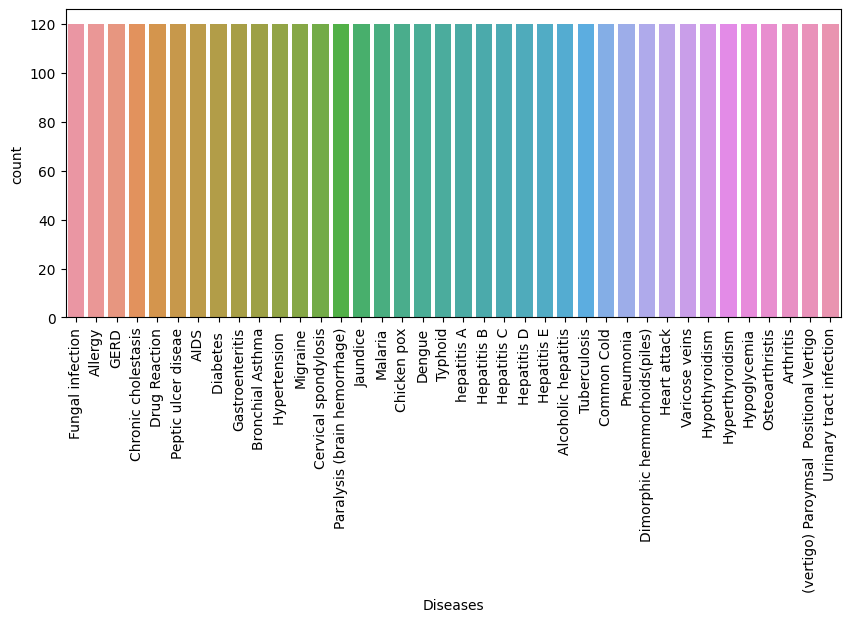

In [860]:
#countplot
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='prognosis')
plt.xticks(rotation=90)
plt.xlabel('Diseases');

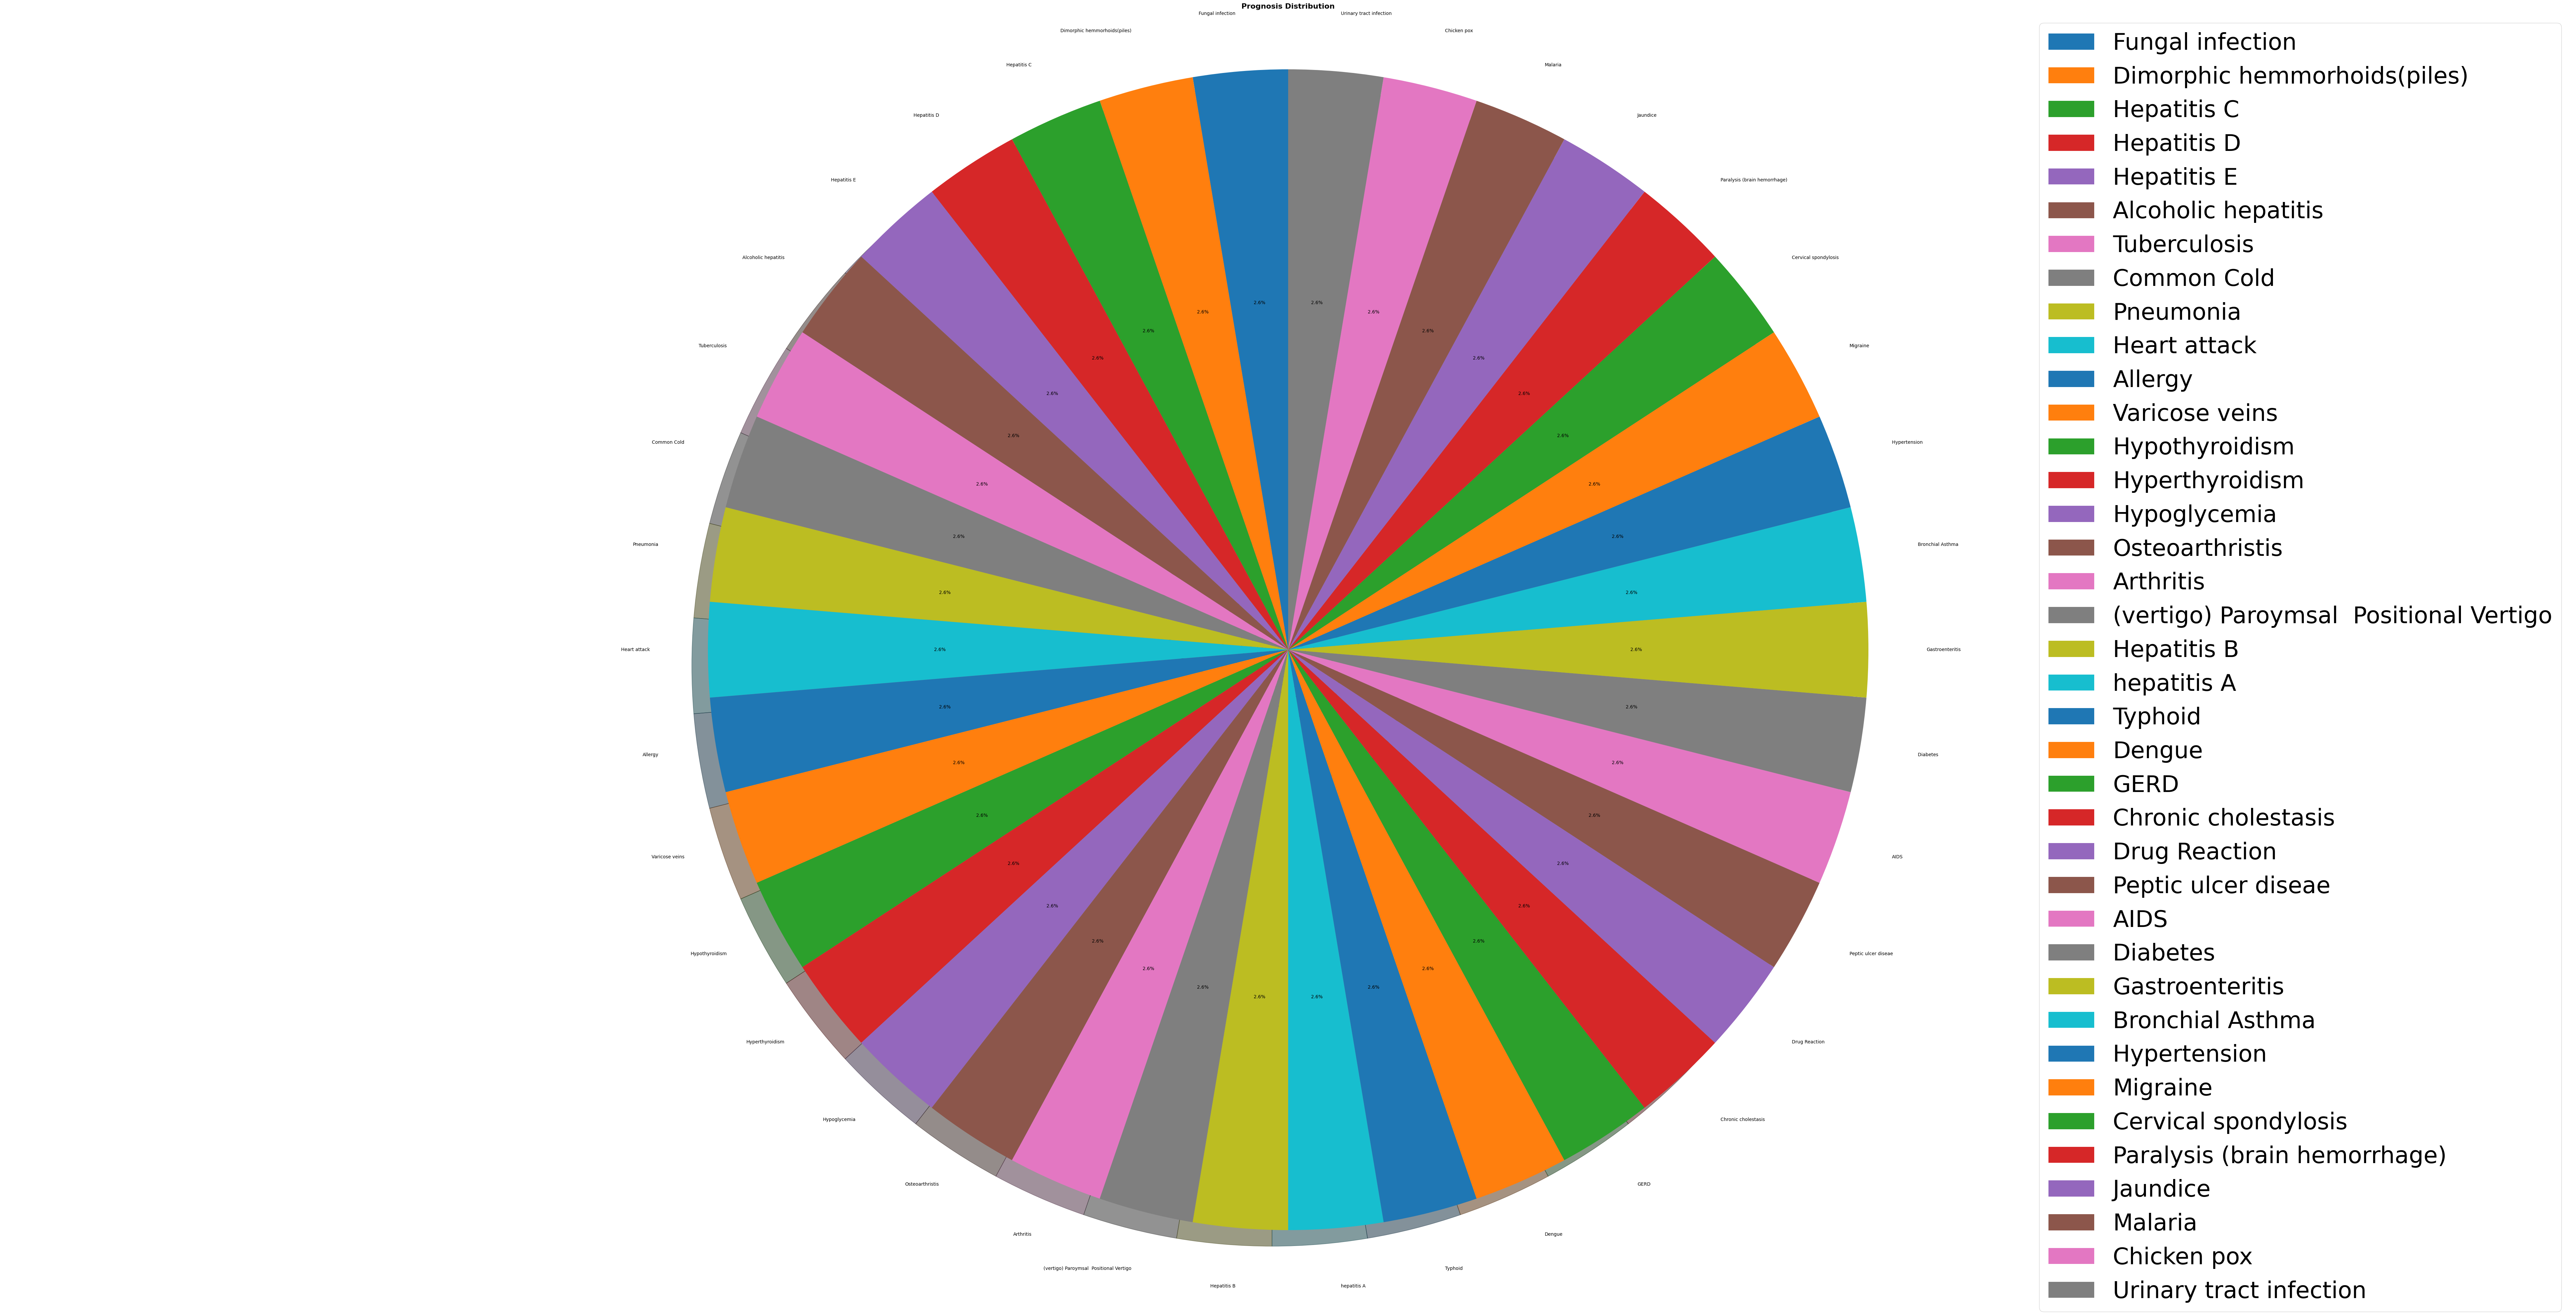

In [331]:
plt.figure(figsize=(100, 50))

category_counts = df['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=16, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=50)
plt.axis('equal')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Get the number of columns (excluding 'prognosis')
num_columns = len(df.columns) - 1

# Calculate the number of rows and columns for the subplots grid
num_rows = int((num_columns + 2) / 3)  # Adjust the number of rows as needed
num_cols = 3  # Set the number of columns per row

# Calculate the figure size based on the number of rows and columns
fig_width = 16
fig_height = 6 * num_rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns (excluding 'prognosis') and create the bar plots
for i, column in enumerate(df.columns):
    if column != 'prognosis':
        cross_tab = pd.crosstab(df['prognosis'], df[column])
        ax = axes[i]

        cross_tab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        ax.set_xlabel('Prognosis')
        ax.set_ylabel('Count')

# Hide the extra subplots if there are more axes than columns
if len(axes) > num_columns:
    for ax in axes[num_columns:]:
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()

KeyboardInterrupt: 

In [863]:
num = ['itching','skin_rash','continuous_sneezing','joint_pain','stomach_pain','acidity','ulcers_on_tongue','burning_micturition',
       'spotting_ urination','weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','irregular_sugar_level','cough','high_fever',
       'sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine','loss_of_appetite','pain_behind_the_eyes',
       'back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure',
       'swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','congestion',
       'chest_pain','weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','bloody_stool','neck_pain','dizziness','cramps','bruising','obesity',
       'swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties','excessive_hunger',
       'drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain','muscle_weakness',
       'stiff_neck','movement_stiffness','spinning_movements','weakness_of_one_body_side','loss_of_smell','bladder_discomfort',
       'foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)','depression','irritability',
       'muscle_pain','altered_sensorium',
       'red_spots_over_body','belly_pain','abnormal_menstruation','dischromic_patches','watering_from_eyes','increased_appetite',
       'polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','coma',
       'stomach_bleeding','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','shivering_or_chills',
       'unprotected_blood/sex_transfusion','pain/irritation_in_anal_region','swollen_painful_joints']

In [950]:
to_remove = ['joint_pain', 'spinning_movements', 'dizziness','swollen_legs']
num = [item for item in num if item not in to_remove]

In [951]:
#correlation
df[num].corr()

,itching,skin_rash,continuous_sneezing,stomach_pain,acidity,ulcers_on_tongue,burning_micturition,spotting_ urination,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,bloody_stool,neck_pain,cramps,bruising,obesity,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,movement_stiffness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,coma,stomach_bleeding,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,shivering_or_chills,unprotected_blood/sex_transfusion,pain/irritation_in_anal_region,swollen_painful_joints
itching,1.000000,0.514071,-0.094541,0.197606,-0.094541,-0.065091,0.202782,0.348368,-0.066920,-0.066920,-0.066920,-0.095876,0.082597,-0.095876,-0.066920,-0.157005,0.039502,-0.065091,-0.138284,-0.174652,-0.065091,-0.094541,-0.086427,0.290321,0.244623,0.216636,-0.068705,-0.095876,-0.095876,0.251241,-0.157005,0.127534,0.359472,0.161892,-0.066920,-0.066920,0.130609,0.211142,-0.119000,-0.121242,-0.068705,-0.068705,-0.068705,-0.177367,-0.065091,-0.097197,-0.066920,-0.066920,-0.095876,-0.066920,-0.066920,-0.095876,-0.065091,-0.066920,-0.068705,-0.068705,-0.097197,-0.140321,-0.066920,-0.068705,-0.066920,-0.066920,-0.097197,-0.095876,-0.066920,-0.065091,-0.068705,-0.066920,-0.063215,-0.066920,-0.066920,-0.066920,-0.066920,-0.097197,-0.142340,-0.142340,-0.066920,0.221279,-0.066920,-0.098503,0.324047,-0.065091,-0.068705,-0.068705,-0.095876,-0.066920,-0.068705,-0.066920,-0.066920,-0.068705,-0.068705,-0.068705,-0.066920,-0.068705,-0.095876,-0.194229,0.226539,-0.068705,-0.176464
skin_rash,0.514071,1.000000,-0.075407,0.250677,-0.075407,-0.051917,0.256024,0.409571,-0.053376,-0.053376,-0.053376,-0.076472,-0.111111,-0.076472,-0.053376,-0.125229,0.147122,-0.051917,-0.110297,-0.139305,-0.051917,-0.075407,0.183657,-0.166667,-0.125988,0.179669,0.465797,0.305888,-0.076472,-0.180283,-0.125229,0.198326,-0.053376,-0.155617,-0.053376,-0.053376,0.201538,0.307469,-0.094916,-0.096704,-0.054800,-0.054800,-0.054800,-0.141470,-0.051917,-0.077525,-0.053376,-0.053376,-0.076472,-0.053376,-0.053376,-0.076472,-0.051917,-0.053376,-0.054800,-0.054800,-0.077525,-0.111922,-0.053376,-0.054800,-0.053376,-0.053376,-0.077525,-0.076472,-0.053376,-0.051917,-0.054800,-0.053376,-0.050421,-0.053376,-0.053376,-0.053376,-0.053376,-0.077525,-0.113532,0.145149,-0.053376,0.657971,-0.053376,-0.078567,0.467257,-0.051917,-0.054800,-0.054800,-0.076472,-0.053376,-0.054800,-0.053376,-0.053376,-0.054800,-0.054800,-0.054800,-0.053376,-0.054800,-0.076472,0.051640,-0.076472,-0.054800,0.079554
continuous_sneezing,-0.094541,-0.075407,1.000000,-0.051176,-0.051176,-0.035234,-0.050444,-0.035234,-0.036224,-0.036224,-0.036224,-0.051899,-0.075407,-0.051899,-0.036224,0.249295,0.106323,-0.035234,-0.074854,-0.094541,-0.035234,-0.051176,0.124455,-0.113110,-0.085503,-0.131525,-0.037190,-0.051899,-0.051899,-0.122351,-0.084988,-0.065629,-0.036224,-0.105611,-0.036224,-0.036224,0.349484,0.208444,-0.064416,0.368493,0.688525,0.688525,0.688525,0.227007,-0.035234,-0.052613,-0.036224

<Axes: >

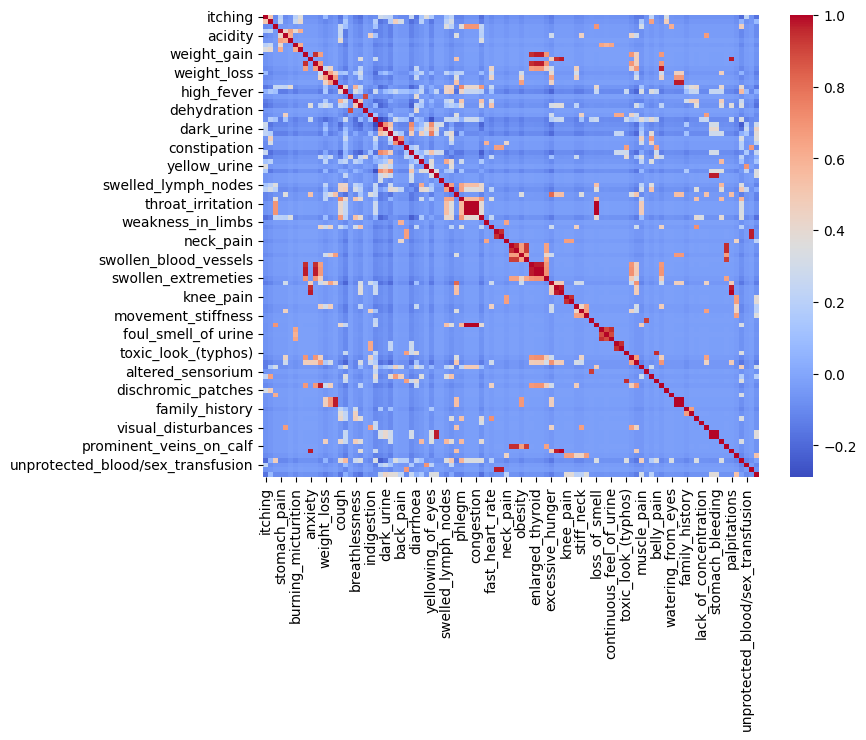

In [952]:
#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=df[num].corr(),cmap='coolwarm')

In [868]:
X = df.drop('prognosis',axis=1)
y = df['prognosis']

In [869]:
X.head()

,itching,skin_rash,continuous_sneezing,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,bloody_stool,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,movement_stiffness,spinning_movements,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,coma,stomach_bleeding,distention_of_abdomen,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,shivering_or_chills,unprotected_blood/sex_transfusion,pain/irritation_in_anal_region,swollen_painful_joints
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [870]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [871]:
X_train.shape

(3648, 108)

In [872]:

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [RandomForestClassifier(n_estimators=100,max_features=85,random_state=42), GradientBoostingClassifier(n_estimators=250), DecisionTreeClassifier(random_state = 0), LogisticRegression()]

# The names of the models
algorithm_names = ["Random Forest Classifier", "Gradient Boosting Classifier", "Decision Tree Classifier", "Logistic Regression"]

In [873]:
def model_train_test(model,X_train,y_train,X_test,y_test):
    
    #model training
    model.fit(X_train,y_train)
    
    #predict
    pred = model.predict(X_test)
    
    #accuracy score
    print("accuracy score = ",accuracy_score(y_test,pred))
    
    #classification report
    print("\n Classification report")
    print(classification_report(y_test,pred))

In [874]:
from sklearn.model_selection import KFold, cross_val_score


#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    print(algorithm_names[i])
    model_train_test(model,X_train, y_train, X_test, y_test)

Random Forest Classifier
accuracy score =  1.0

 Classification report
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        26
                                   AIDS       1.00      1.00      1.00        28
                    Alcoholic hepatitis       1.00      1.00      1.00        13
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        26
                   Cervical spondylosis       1.00      1.00      1.00        20
                            Chicken pox       1.00      1.00      1.00        17
                    Chronic cholestasis       1.00      1.00      1.00        27
                            Common Cold       1.00      1.00      1.00        22
                                 Deng

In [875]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction


In [876]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction


In [877]:
#testing dataset percentage 
print("Testing Dataset percentage = ",100 * len(df_test)/(len(df)+len(df_test)))

Testing Dataset percentage =  0.9126466753585397


In [878]:
df_test.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,0.023810,0.404762,0.047619,0.023810,0.404762,0.023810,0.023810,0.023810,0.047619,0.095238,0.047619,0.095238,0.023810,0.023810,0.119048,0.285714,0.023810,0.095238,0.142857,0.023810,0.047619,0.238095,0.190476,0.119048,0.238095,0.238095,0.023810,0.047619,0.047619,0.214286,0.119048,0.071429,0.023810,0.166667,0.023810,0.0,0.023810,0.071429,0.142857,0.071429,0.071429,0.023810,0.023810,0.023810,0.023810,0.023810,0.142857,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.071429,0.023810,0.023810,0.047619,0.023810,0.023810,0.

In [879]:
df_test['shivering_or_chills'] = df_test['shivering'] | df_test['chills']
df_test.drop(columns=['shivering','chills'], inplace=True)

In [880]:
df_test['skin_rash'] = df_test['nodal_skin_eruptions'] | df_test['skin_rash']
df_test.drop(columns=['nodal_skin_eruptions'], inplace=True)

In [881]:
df_test['unprotected_blood_transfusion'] = df_test['receiving_blood_transfusion'] | df_test['receiving_unsterile_injections']
df_test.drop(columns=['receiving_blood_transfusion','receiving_unsterile_injections'], inplace=True)

In [882]:
df_test['patches_in_throat'] = df_test['patches_in_throat'] | df_test['muscle_wasting']
df_test.drop(columns=['patches_in_throat'], inplace=True)

In [883]:
df_test['vomiting'] = df_test['vomiting'] | df_test['nausea']
df_test.drop(columns=['nausea'], inplace=True)

In [884]:
df_test['runny_nose'] = df_test['runny_nose'] | df_test['sinus_pressure']
df_test.drop(columns=['sinus_pressure'], inplace=True)

In [885]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['loss_of_balance']
df_test.drop(columns=['loss_of_balance'], inplace=True)

In [886]:
df_test['distention_of_abdomen'] = df_test['distention_of_abdomen'] | df_test['history_of_alcohol_consumption']
df_test.drop(columns=['history_of_alcohol_consumption',], inplace=True)

In [887]:
df_test['unprotected_blood/sex_transfusion'] = df_test['unprotected_blood_transfusion'] | df_test['extra_marital_contacts']
df_test.drop(columns=['extra_marital_contacts','unprotected_blood_transfusion'], inplace=True)

In [888]:
df_test['pain/irritation_in_anal_region'] = df_test['pain_in_anal_region'] | df_test['irritation_in_anus']
df_test.drop(columns=['irritation_in_anus','pain_in_anal_region'], inplace=True)

In [889]:
df_test['fatigue'] = df_test['fatigue'] | df_test['lethargy']
df_test.drop(columns=['lethargy'], inplace=True)

In [924]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['spinning_movements']
df_test.drop(columns=['spinning_movements'], inplace=True)

In [890]:
df_test.rename(columns={'dischromic _patches': 'dischromic_patches'}, inplace=True)

In [891]:
df_test.drop(columns=['fluid_overload','fluid_overload.1'],inplace=True)

In [892]:
label_mapping = {
    'Acne': 'Skin Disorders',
    'Psoriasis': 'Skin Disorders',
    'Impetigo': 'Skin Disorders'
}

df_test['prognosis'] = df_test['prognosis'].replace(label_mapping)

In [893]:
columns_to_drop = ['pus_filled_pimples', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'skin_peeling','yellow_crust_ooze']
df_test.drop(columns=columns_to_drop, inplace=True)

In [894]:
df_test = df_test[df_test['prognosis'] != 'Skin Disorders']

In [895]:
df_test['swollen_painful_joints'] = df_test['swelling_joints'] | df_test['joint_pain']
df_test.drop(columns=['joint_pain','swelling_joints'], inplace=True)

In [937]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['dizziness']
df_test.drop(columns=['dizziness'], inplace=True)

In [947]:
df_test['swollen_extremeties'] = df_test['swollen_extremeties'] | df_test['swollen_legs']
df_test.drop(columns=['swollen_legs'], inplace=True)

In [948]:
df.head()

,itching,skin_rash,continuous_sneezing,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,bloody_stool,neck_pain,cramps,bruising,obesity,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,movement_stiffness,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,coma,stomach_bleeding,distention_of_abdomen,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,prognosis,shivering_or_chills,unprotected_blood/sex_transfusion,pain/irritation_in_anal_region,swollen_painful_joints
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0


In [949]:
df_test.head()

,itching,skin_rash,continuous_sneezing,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,bloody_stool,neck_pain,cramps,bruising,obesity,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,movement_stiffness,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,coma,stomach_bleeding,distention_of_abdomen,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,prognosis,shivering_or_chills,unprotected_blood/sex_transfusion,pain/irritation_in_anal_region,swollen_painful_joints
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy,1,0,0,0
2,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis,0,0,0,0
4,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction,0,0,0,0


In [953]:
df_test.columns[df.isnull().any()]

Index([], dtype='object')

In [941]:
df_test.columns

Index(['itching', 'skin_rash', 'continuous_sneezing', 'stomach_pain',
       'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting',
       'burning_micturition', 'spotting_ urination',
       ...
       'distention_of_abdomen', 'blood_in_sputum', 'prominent_veins_on_calf',
       'palpitations', 'painful_walking', 'prognosis', 'shivering_or_chills',
       'unprotected_blood/sex_transfusion', 'pain/irritation_in_anal_region',
       'swollen_painful_joints'],
      dtype='object', length=107)

In [900]:
X = df_test.drop('prognosis',axis=1)
y = df_test['prognosis']

In [901]:
def test_accuracy(model,X):
    
    #predict
    pred = model.predict(X)
    
    #accuracy score
    print("accuracy score = ",accuracy_score(y,pred))
    
    #classification report
    print("\n",classification_report(y,pred))

In [902]:
from sklearn.model_selection import KFold, cross_val_score


#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    print(algorithm_names[i])
    test_accuracy(model,X)

Random Forest Classifier
accuracy score =  0.9743589743589743

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                                 Dengue     

In [903]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}  # l1 lasso l2 ridge
logreg = LogisticRegression(solver='liblinear')  # Specify the solver here
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)


tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2'}
accuracy: 1.0


In [904]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
logreg_pred = logreg_cv.predict(X_test)

# Compute accuracy
logreg_acc = accuracy_score(y_test, logreg_pred)

# Get confidence scores (probability estimates) for each class
logreg_confidence = logreg_cv.predict_proba(X_test)

print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))


Accuracy on test set: 100.00%


In [905]:
best_logreg = logreg_cv.best_estimator_
best_logreg

LogisticRegression(C=0.01, solver='liblinear')

In [906]:
feature_importances = best_logreg.coef_[0]


In [907]:
feature_importances

array([-0.27912252, -0.22083049, -0.11432618, -0.13679345, -0.13070258,
       -0.066986  , -0.08667933, -0.16204588, -0.16071828, -0.06926772,
       -0.52519987, -0.03933421, -0.04158015, -0.03977667, -0.06842895,
       -0.11282835, -0.07524017, -0.04430559, -0.16695853, -0.35487441,
       -0.08723353, -0.14192485, -0.21305117, -0.08399602, -0.12677708,
        0.11608827, -0.26763854, -0.1111862 , -0.28639772, -0.01926605,
       -0.13116816, -0.12687698, -0.31638613, -0.21649404, -0.06776669,
       -0.02104307, -0.1762686 , -0.01669665, -0.077734  , -0.06441672,
       -0.12684186, -0.15270136, -0.05600457, -0.02457921, -0.02457921,
       -0.02457921, -0.02457921, -0.31208955, -0.11348863, -0.05240051,
       -0.10253204, -0.10253204, -0.19138143, -0.27980591, -0.06543433,
       -0.06469955, -0.11049797, -0.06469955, -0.06104053, -0.03800906,
       -0.04066272, -0.04066272, -0.04066272, -0.18310385, -0.04290818,
       -0.04423959, -0.07161599, -0.07252718, -0.11141748, -0.14

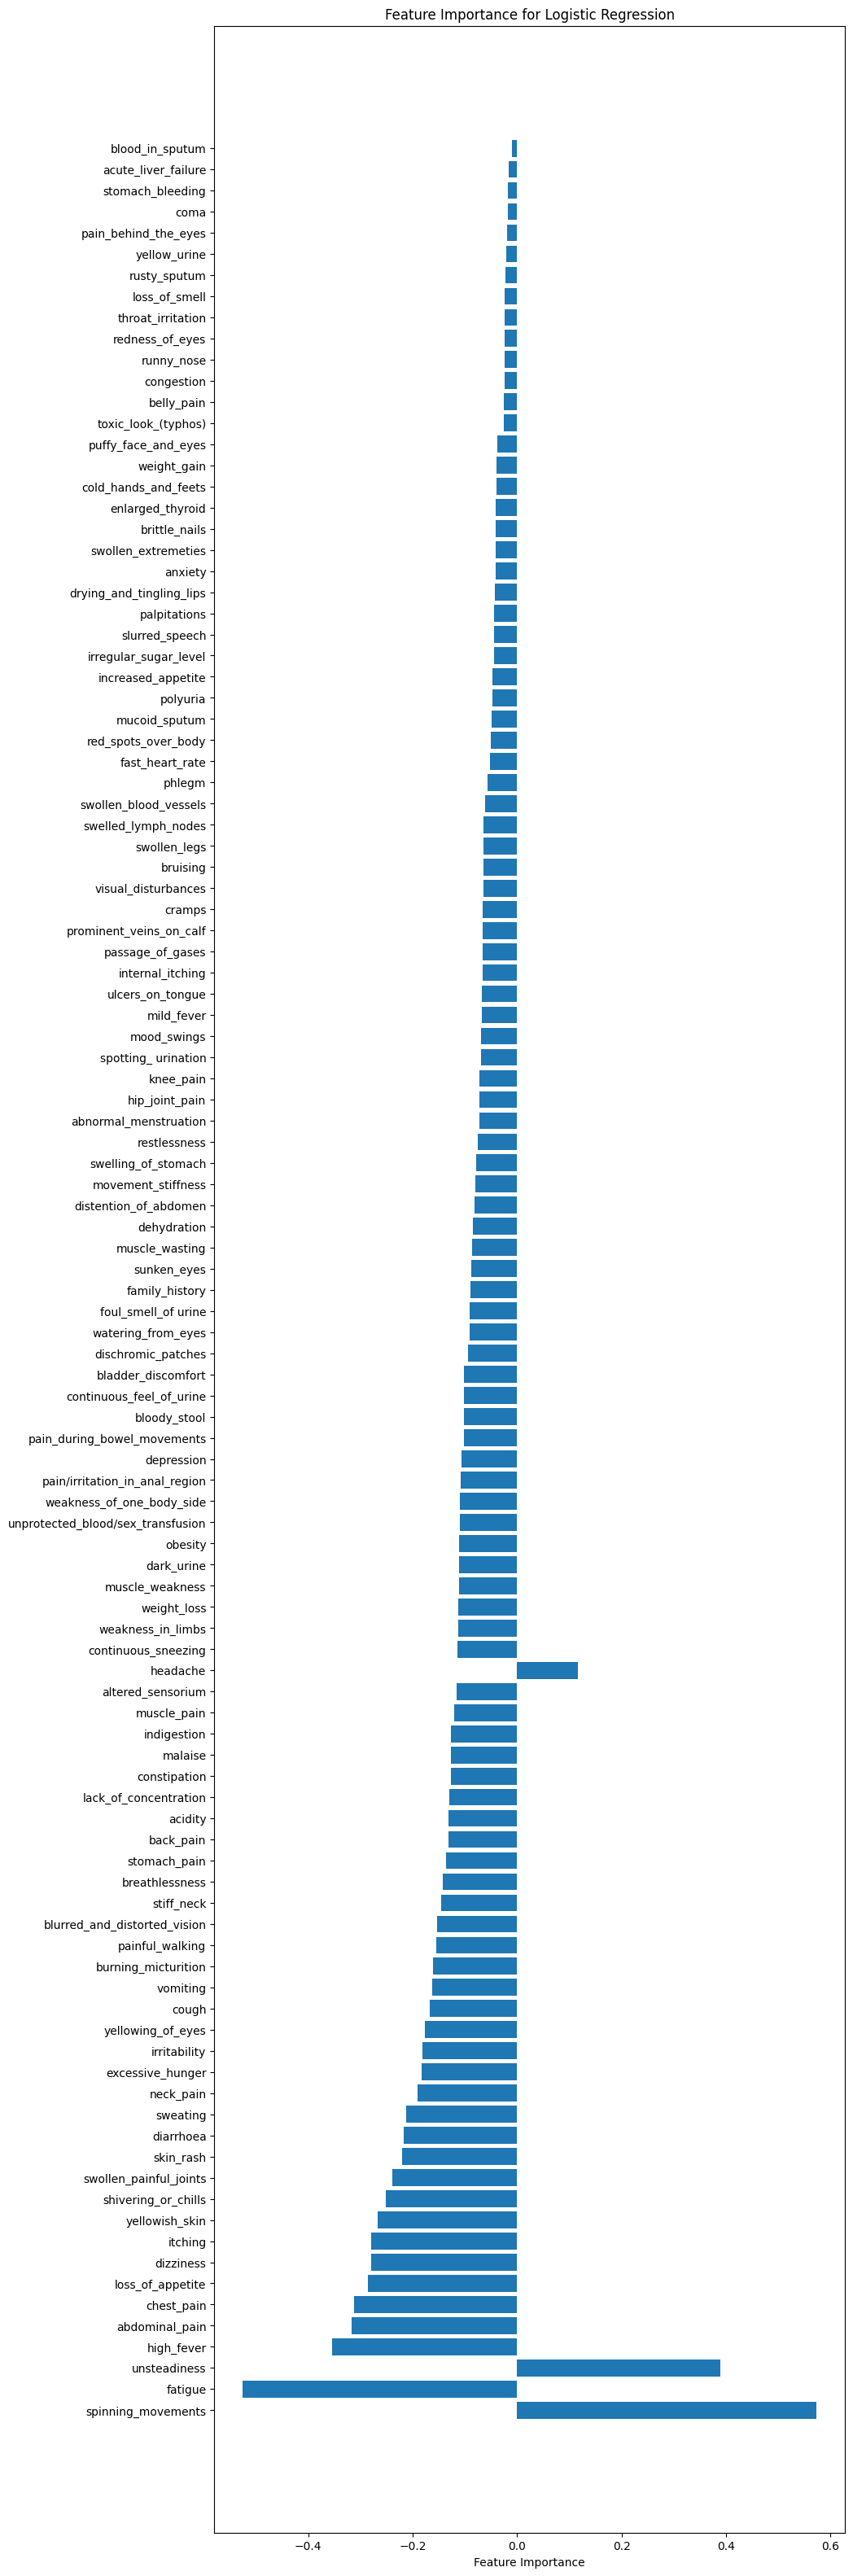

In [908]:
import numpy as np

# Calculate the absolute values of the feature coefficients
abs_coef = np.abs(best_logreg.coef_[0])

# Get the indices that would sort the coefficients in descending order
sorted_idx = np.argsort(abs_coef)[::-1]

# Sort the feature names and coefficients based on the sorted indices
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_coefs = best_logreg.coef_[0][sorted_idx]

# Set the figure size
plt.figure(figsize=(10, 40))  # Adjust the values (width, height) as needed

# Create a horizontal bar plot for the top features
plt.barh(sorted_features, sorted_coefs)

# Add labels, titles, etc. as needed
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Logistic Regression")

# Show the plot
plt.show()


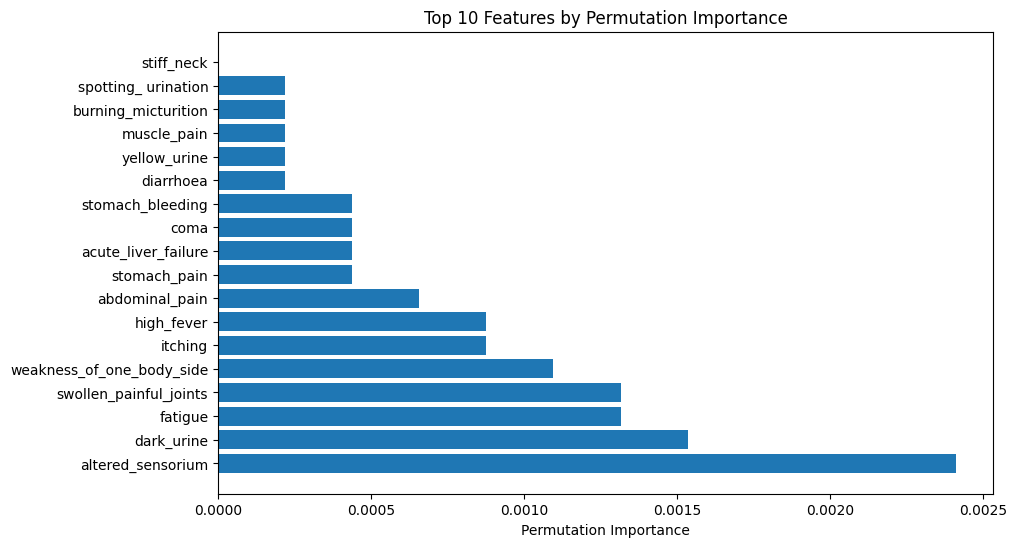

In [914]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_logreg, X_test, y_test)

# Get the indices of the top 10 features with the highest permutation importance
top_10_indices = (-perm_importance.importances_mean).argsort()[:18]

# Sort the importances and feature names based on the top 10 indices
sorted_importances = perm_importance.importances_mean[top_10_indices]
sorted_feature_names = X.columns[top_10_indices]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Permutation Importance")
plt.title("Top 10 Features by Permutation Importance")
plt.show()


In [912]:
faker_data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0]
# Reshape the input data to match the number of features
faker_data_reshaped = np.array(faker_data).reshape(1, -1)  # Reshape z to have the same number of features as the training data

logreg_confidence = logreg_cv.best_estimator_.predict_proba(faker_data_reshaped)
print(logreg_confidence)
logreg_pred = logreg_cv.best_estimator_.predict(faker_data_reshaped)
print(logreg_pred)
max_confidence = max(logreg_confidence[0])
print("Maximum confidence:", max_confidence)

[[0.02620047 0.02910233 0.02725234 0.02934876 0.04174915 0.02665602
  0.02778926 0.02403962 0.02529322 0.02350891 0.0215756  0.02528116
  0.02869137 0.02711239 0.02930029 0.02595974 0.02791363 0.0271155
  0.0246014  0.02571877 0.02338635 0.02268354 0.02672583 0.02387341
  0.022644   0.02469153 0.02382293 0.0244505  0.03558141 0.02573519
  0.02715782 0.02621107 0.02450689 0.02215484 0.0227655  0.02868924
  0.02691307 0.02379695]]
['Arthritis']
Maximum confidence: 0.04174914663924351


c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
